# O4 Smoothing Filters
## 2.7.1 Blurring
### Discrete Gaussian (Page 103)

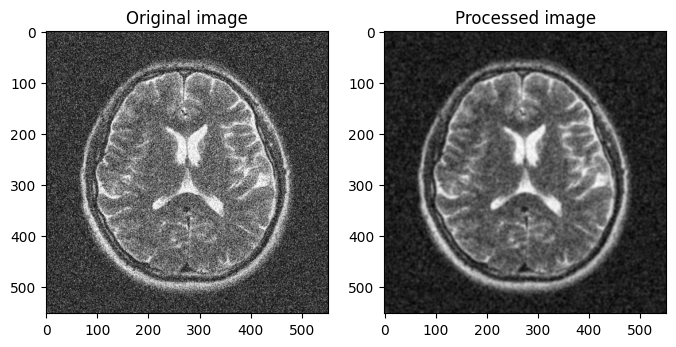

In [1]:
from src.smoothing.bluring import discrete_gaussian

input_image = "./assets/brain-noise.png"
variance = 3
output_image = "./exports/bluring/brain-noise[discrete-gaussian].png"

discrete_gaussian(input_image, variance, output_image)

### Binomial Blurring (Page 105)


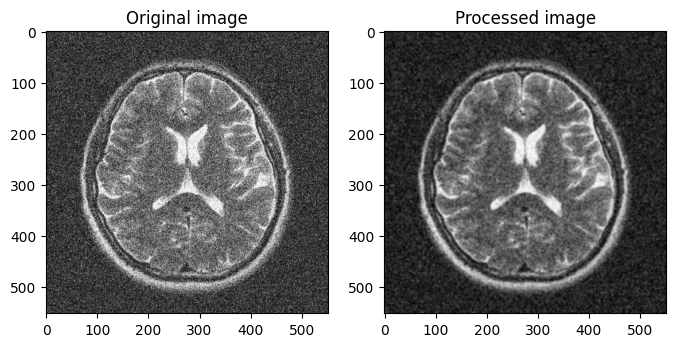

In [2]:
from src.smoothing.bluring import binomial

input_image = "./assets/brain-noise.png"
radius = 3
output_image = "./exports/bluring/brain-noise[binomial].png"

binomial(input_image, radius, output_image)

### Median Bluring

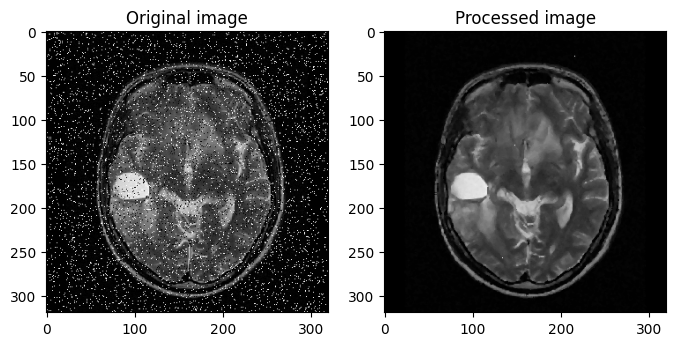

In [4]:
from src.smoothing.bluring import median

input_image = "assets/brain-noise-salt.png"
radius = 1
output_image = "./exports/bluring/brain-noise-salt[median].png"

median(input_image, radius, output_image)

### Recursive Gaussian IIR (Page 107)

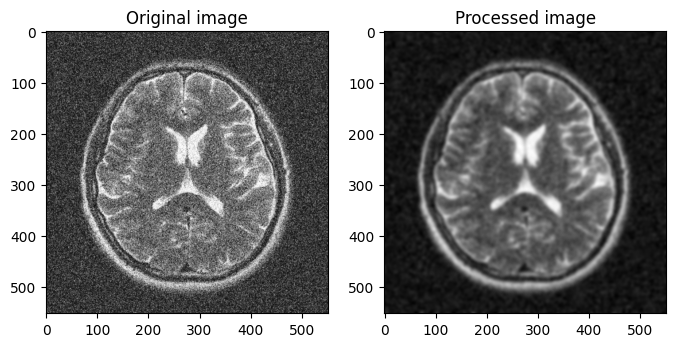

In [3]:
from src.smoothing.bluring import recursive_gaussian_iir

input_image = "./assets/brain-noise.png"
sigma = 3
output_image = "./exports/bluring/brain-noise[recursive-gaussian-iir].png"

recursive_gaussian_iir(input_image, sigma, output_image)

## 2.7.3 Edge Preserving Smoothing
### Gradient Anisotropic Diffusion (Page 112)

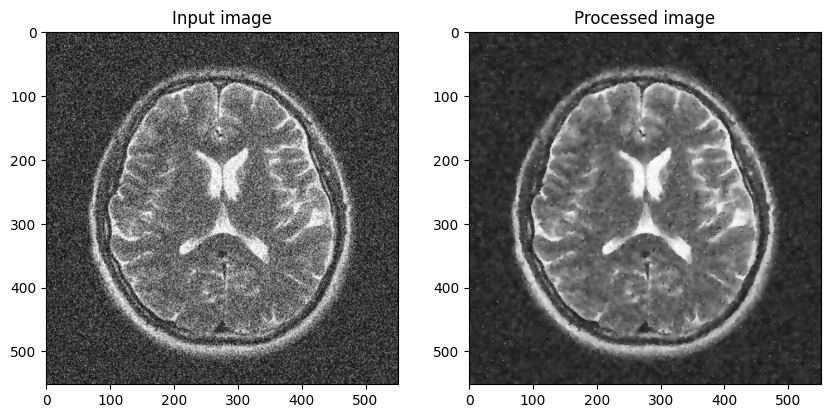

In [4]:
from src.smoothing.edge_preserving_smoothing import grad_anisotropic_diffusion

conductance = 1.5
timeStep = 0.125
numberOfIterations = 25
inputImagePath = "assets/brain-noise.png"
grad_anisotropic_diffusion(inputImagePath, numberOfIterations, conductance, timeStep, "exports/bluring/brain-noise[grad-anisotropic-diffusion].png")

### Curvature Anisotropic Diffusion (Page 114)

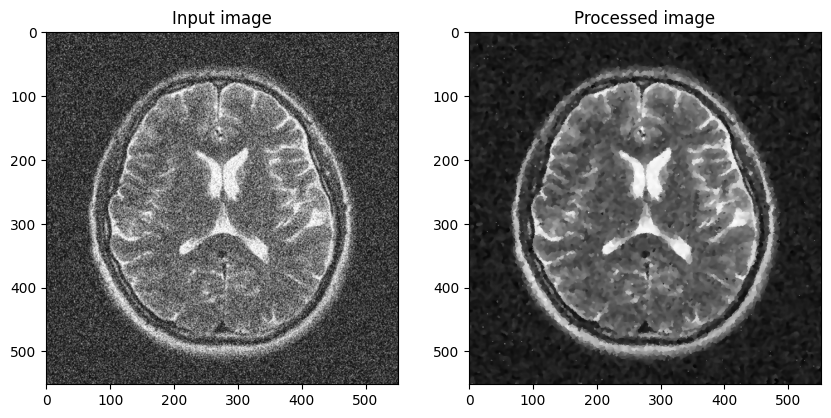

In [5]:
from src.smoothing.edge_preserving_smoothing import curve_anisotropic_diffusion


inputImagePath = "assets/brain-noise.png"
numberOfIterations = 25
conductance = 1.5
timeStep = 0.125
useImageSpacing = True

curve_anisotropic_diffusion(
    inputImagePath,
    numberOfIterations,
    conductance,
    timeStep,
    useImageSpacing,
    "exports/bluring/brain-noise[curve-anisotropic-diffusion].png"
)

# O8 Registration

## 2D Translation Registration

libpng warning: sCAL: invalid unit
libpng warning: sCAL: invalid unit
libpng warning: sCAL: invalid unit


Result = 
 Translation X = 13.00123653240422
 Translation Y = 16.999943471681494
 Iterations    = 22
 Metric value  = 0.0006793961893802234


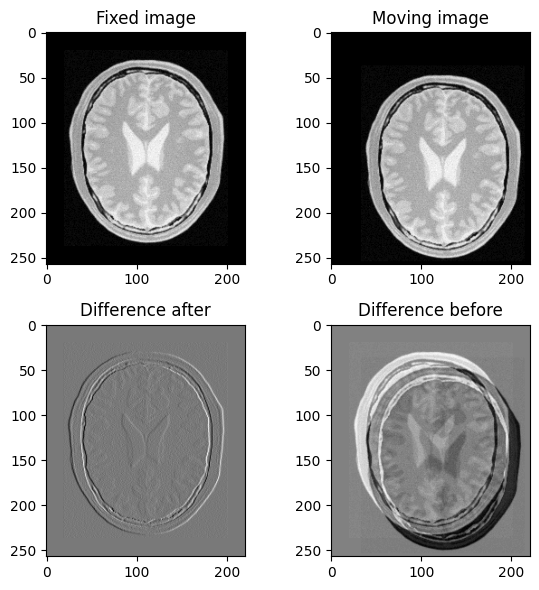

In [6]:
from src.registration import register_unimodal

fixed_input_image = (
    "./assets/registration/translation/BrainProtonDensitySliceBorder20.png"
)
moving_input_image = (
    "./assets/registration/translation/BrainProtonDensitySliceShifted13x17y.png"
)
export_dir = "./exports/registration/unimodal/"
register_unimodal(fixed_input_image, moving_input_image, export_dir)

## Multi Modality Registration

Optimizer stop condition:  GradientDescentOptimizer: Maximum number of iterations (200) exceeded.
Result 
 Translation X =  5.046442627558806
 Translation Y =  17.047410895811876
 Iterations    =  200
 Metric value  =  0.5887726075731106
 Numb. Samples =  593


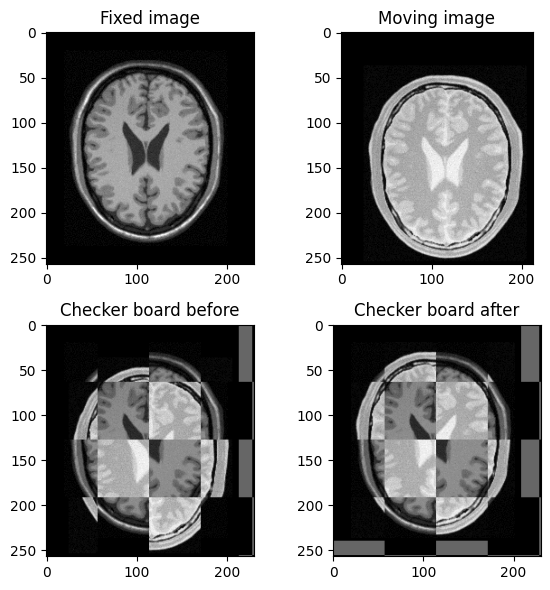

In [7]:
from src.registration import register_multimodal

fixedImageFile = "assets/registration/multi-modal/brain1.png"
movingImageFile = "assets/registration/multi-modal/brain2.png"
outputDir = "./exports/registration/multimodal"
register_multimodal(
    fixedImageFile, movingImageFile, outputDir
)

# C6 Creating Filters
## Composite Filters

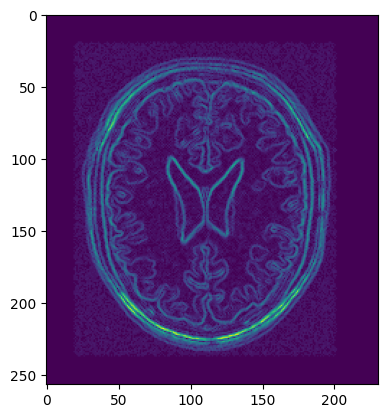

In [5]:
from src.composite_filter import EdgeFilter
import matplotlib.pyplot as plt
import itk
from PIL import Image
import os

inputImagePath = "assets/registration/multi-modal/brain1.png"
exportPath = "./exports/bluring/brain[composite-filter-edges].png"
m_Threshold = 10

InputImageType = itk.Image[itk.F, 2]
reader = itk.ImageFileReader[InputImageType].New()
reader.SetFileName(inputImagePath)
edgeFilter = EdgeFilter()

edgeFilter.SetInput(reader.GetOutput())
edgeFilter.ThresholdBelow(m_Threshold)
edgeFilter.Update()

output = edgeFilter.GetOutput().__array__()

plt.imshow(output)
plt.show()

if exportPath is not None:
    dir, _ = os.path.split(exportPath)
    os.makedirs(dir, exist_ok=True)
    output = Image.fromarray(output)
    output.save(exportPath)